<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

###### Output variable (based on sensory data):
12. quality (score between 0 and 10)

    1. Input: all data except quality
    2. Output: quality
    3. Type of variable:
        3.1 Predictor: all except quality
        3.2 Target: quality

In [1760]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1761]:
df=pd.read_csv('./winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1762]:
i = 1
for h in df:
    print(i, "/", h, "\t",len(df[h].unique()),":", df[h].unique())
    i = i+1

1 / fixed acidity 	 68 : [ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9 ]
2 / volatile acidity 	 125 : [0.27  0.3   0.28  0.23  0.32  0.22  0.18  0.16  0.42  0.17  0.48  0.66
 0.34  0.31  0.26  0.67  0.25  0.24  0.14  0.12  0.39  0.33  0.45  0.46
 0.19  0.2   0.21  0.38  0.47  0.35  0.54  0.43  0.44  0.265 0.36  0.305
 0.13  0.41  0.485 0.425 0.37  0.255 0.595 0.29  0.53  0.15  0.57  0.4
 0.245 0.685 0.495 0.64  0.52  0.115 0.58  0.585 0.59  0.6   0.55  0.125
 0.1   0.145 0.335 0.365 0.905 0.49  0.155 0.51  0.62  0.345 0.475 0.56
 0.235 0.105 0.5   0.11  0.225 0.395 0.655 0.205 0.415 0.705 0.08  0.68
 0.275 0.61  0.135 0.165 0.85  

In [1763]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [1764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [1765]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**All the data (except quality) are Continuous Variable and no Null values in data**

In [1766]:
df.shape

(4898, 12)

In [1767]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [1768]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


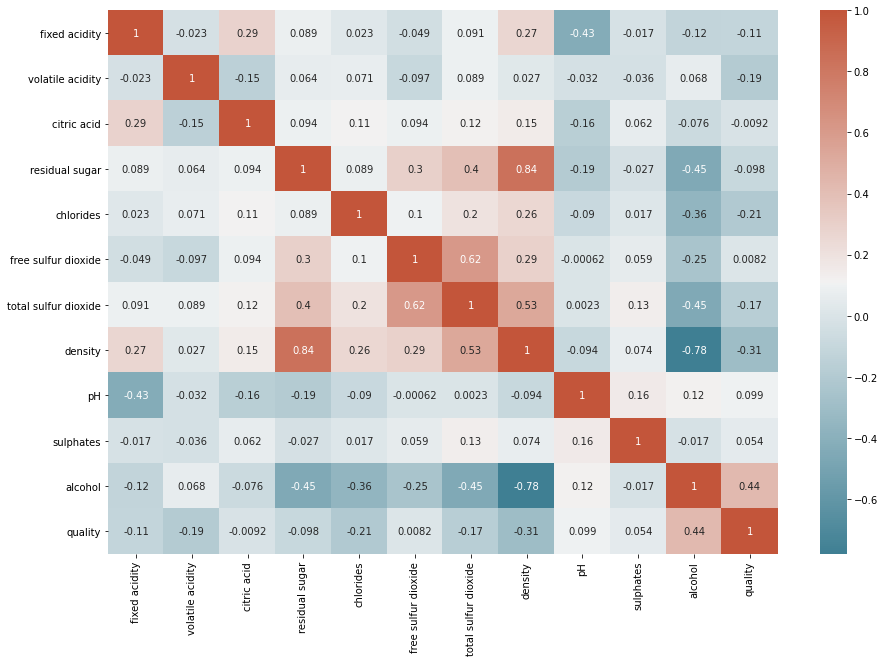

In [1769]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Observe the Correlogram, we can see:
- wine quality is highly correlated with alcohol quantity and density. However, the alcohol quantity can reduce the density so we can use alcohol to predict wine's quality
- wine quality is negatively correlated with the volatile acidity, as too high levels of it might leads to vinegary taste
- pH is negatively correlated with fixed acidity, citric acid, total sulfur dioxide and residual sugar

In [1770]:
df.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

Base on the variance, there is a large amount of outliers are observed in 3 elements below:
- residual sugar            25.725770
- free sulfur dioxide      289.242720
- total sulfur dioxide    1806.085491

In [1772]:
df.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

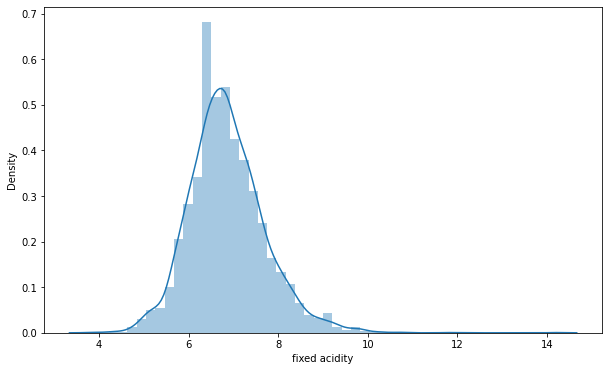

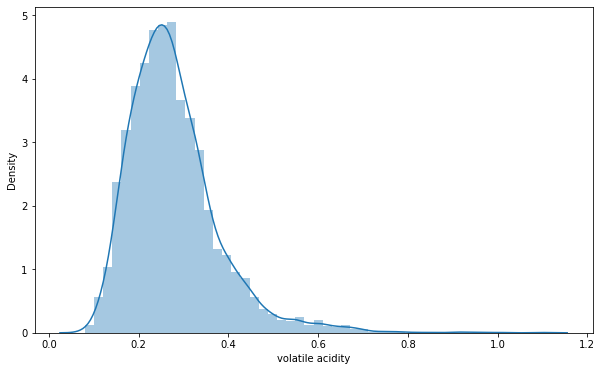

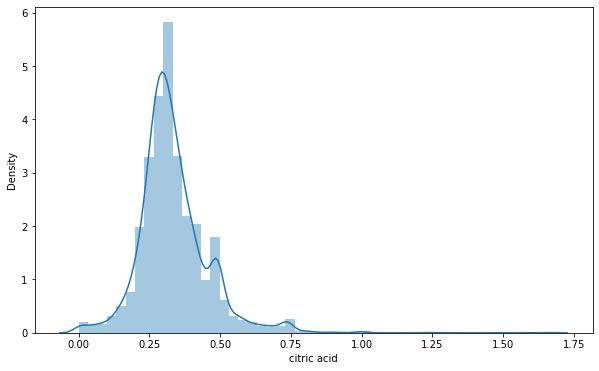

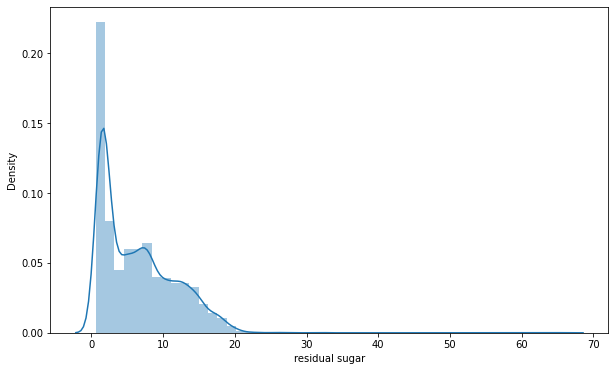

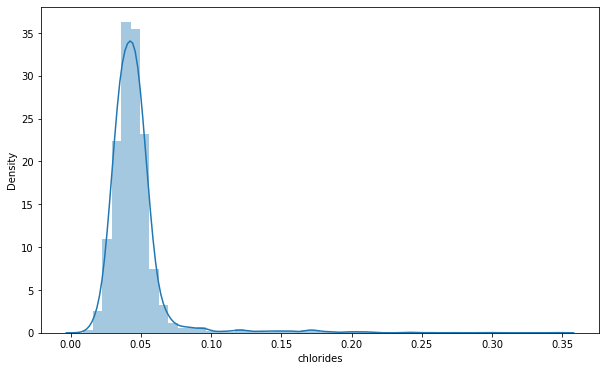

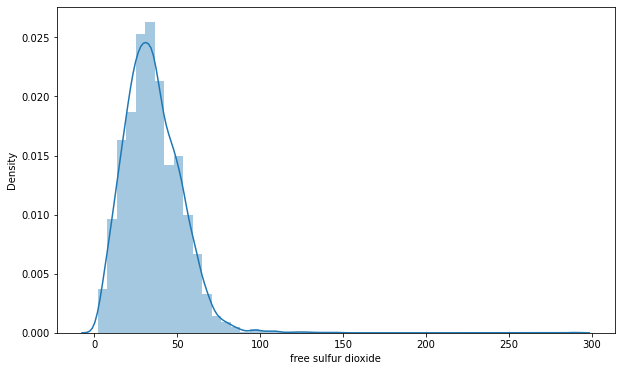

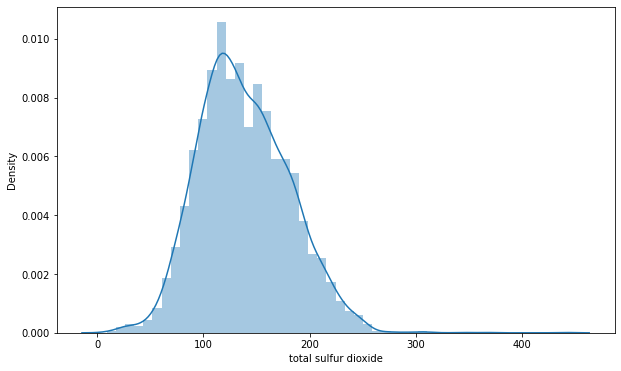

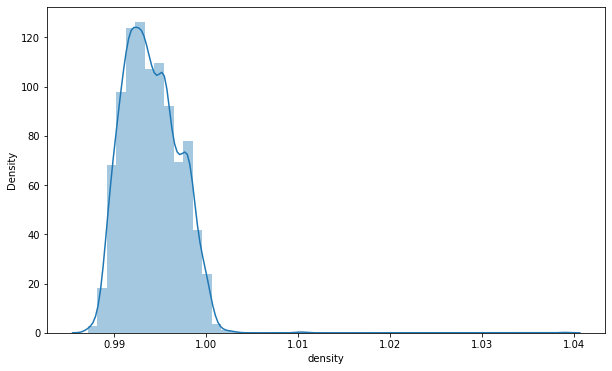

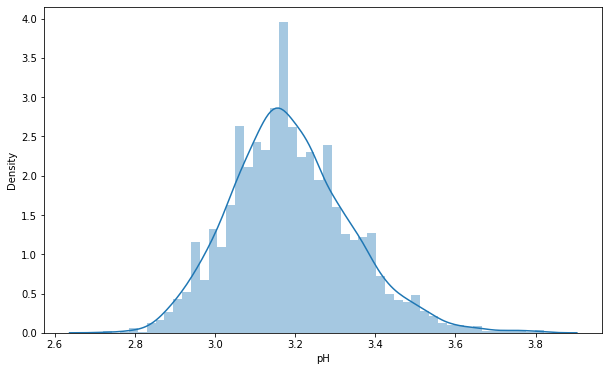

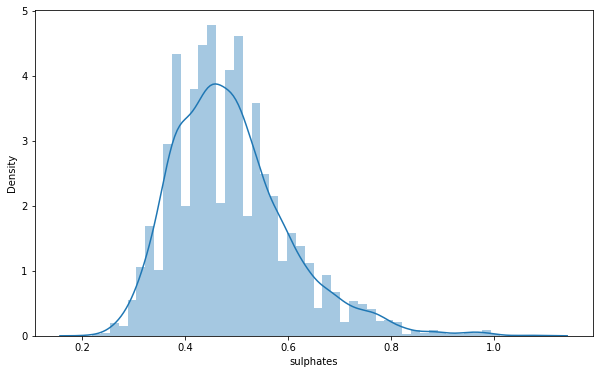

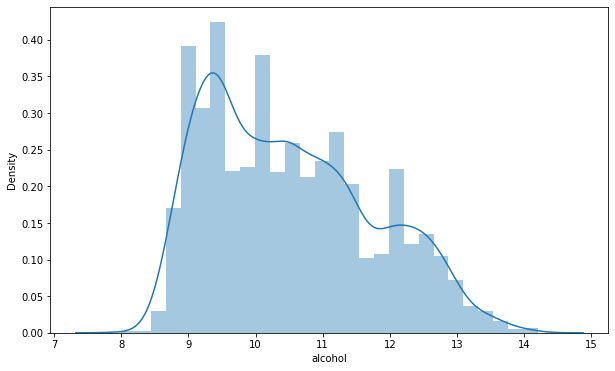

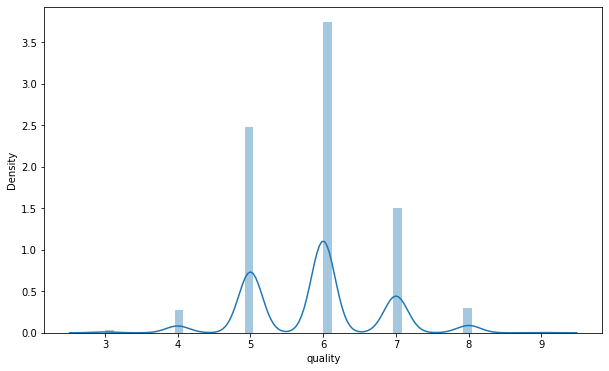

In [1773]:
for h in df:
    plt.figure(figsize=(10,6))
    sns.distplot(df[h])
    plt.show()

**Looking to the skewness and the diagram, we can see some elements are skewed towards right:**
- volatile acidity (1.576980)
- citric acid (1.281920)
- residual sugar (1.077094)
- chlorides (5.023331)
- free sulfur dioxide (1.406745)
- density (0.977773)

In [1774]:
df.kurtosis()

fixed acidity            2.172178
volatile acidity         5.091626
citric acid              6.174901
residual sugar           3.469820
chlorides               37.564600
free sulfur dioxide     11.466342
total sulfur dioxide     0.571853
density                  9.793807
pH                       0.530775
sulphates                1.590930
alcohol                 -0.698425
quality                  0.216526
dtype: float64

Looking to the kurtosis, we can see some elements are shaper and taller than normal distribution:

- fixed acidity            2.172178
- volatile acidity         5.091626
- citric acid              6.174901
- residual sugar           3.469820
- chlorides               37.564600
- free sulfur dioxide     11.466342
- density                  9.793807
- sulphates                1.590930

In [1775]:
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


In [1776]:
df.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [1777]:
df.median()

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
dtype: float64

**According to the mean and median index, we can find out the outliers of:**
- residual sugar
- free sulfur dioxide
- total sulfur dioxide

effect a lot to the data (because mean and median are different too much)

## OUTLIERS TREATMENT ##

In [1778]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import iqr
import statistics as stats
import scipy

In [1779]:
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))
df.apply(find_iqr)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64

In [1780]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [1781]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

fixed acidity           119
volatile acidity        186
citric acid             270
residual sugar            7
chlorides               212
free sulfur dioxide      50
total sulfur dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
quality                 200
dtype: int64

In [1782]:
percentiles = np.array([25, 75])
x_fixedacidity = np.percentile(df['fixed acidity'], percentiles)
IQR_fixedacidity = iqr(df['fixed acidity'])
x_fixedacidity, IQR_fixedacidity

(array([6.3, 7.3]), 1.0)

In [1783]:
x_fixedacidity[1] + 1.5*IQR_fixedacidity

8.8

In [1784]:
fixedacidity = df[(df['fixed acidity'] > x_fixedacidity[1] + 1.5*IQR_fixedacidity) | (df['fixed acidity'] < x_fixedacidity[0] - 1.5*IQR_fixedacidity)]
fixedacidity.index

Int64Index([  98,  169,  207,  294,  358,  551,  555,  656,  774,  847,
            ...
            4259, 4446, 4470, 4518, 4522, 4679, 4786, 4787, 4792, 4847],
           dtype='int64', length=119)

In [1785]:
percentiles = np.array([25, 75])
x_volatileacidity = np.percentile(df['volatile acidity'], percentiles)
IQR_volatileacidity = iqr(df['volatile acidity'])
x_volatileacidity, IQR_volatileacidity

(array([0.21, 0.32]), 0.11000000000000001)

In [1786]:
x_volatileacidity[1] + 1.5*IQR_volatileacidity

0.48500000000000004

In [1787]:
volatileacidity = df[(df['volatile acidity'] > x_volatileacidity[1] + 1.5*IQR_volatileacidity) | (df['volatile acidity'] < x_volatileacidity[0] - 1.5*IQR_volatileacidity)]
volatileacidity.index

Int64Index([  17,   20,   23,   79,  147,  178,  188,  202,  208,  221,
            ...
            4779, 4789, 4792, 4815, 4836, 4847, 4860, 4867, 4877, 4878],
           dtype='int64', length=186)

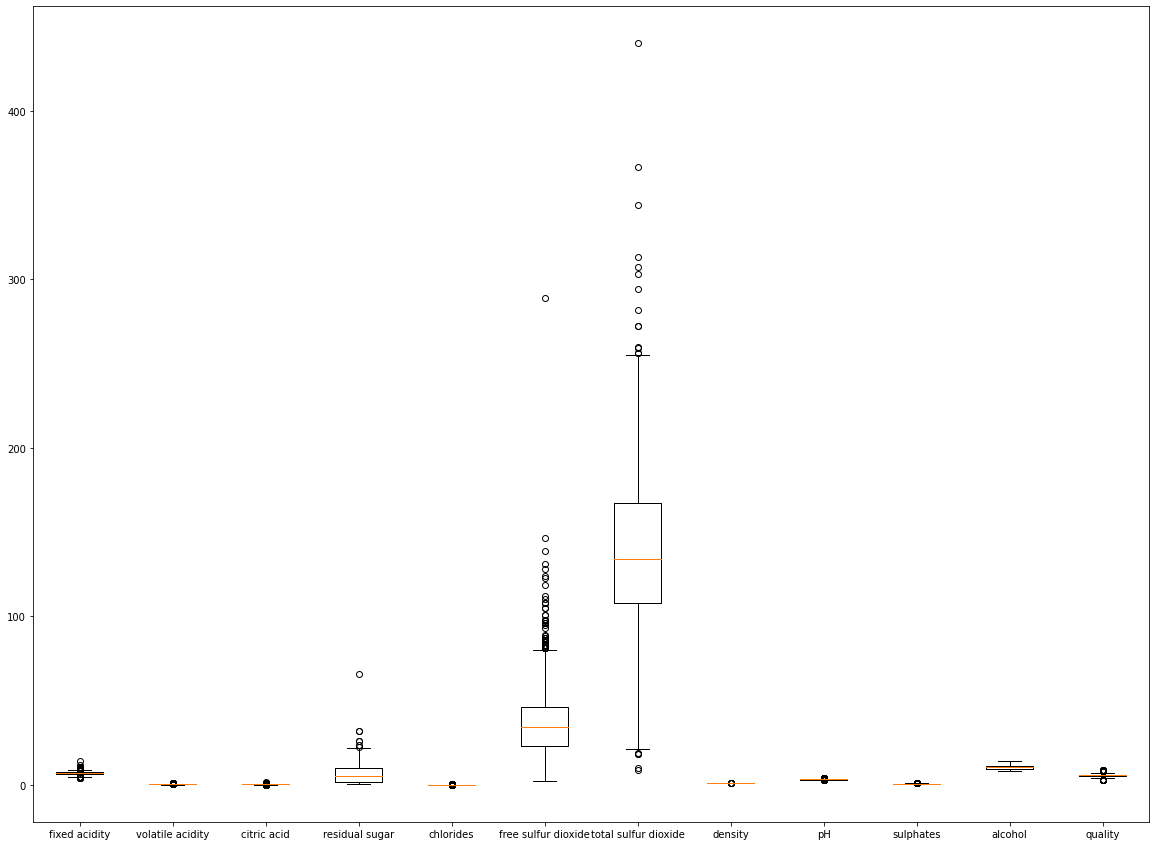

In [1788]:
plt.figure(figsize=(20,15))
plt.boxplot(df, labels= df.columns)
plt.show()

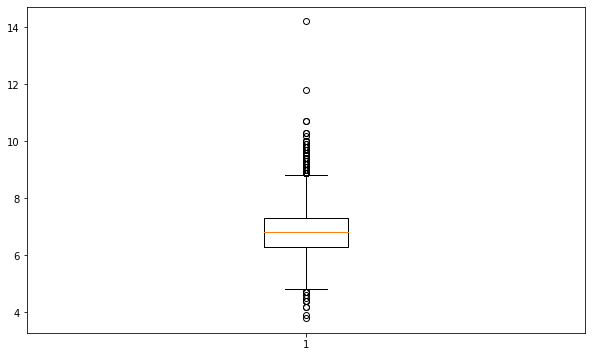

In [1790]:
plt.figure(figsize=(10,6))
plt.boxplot(df['fixed acidity'])
plt.show()

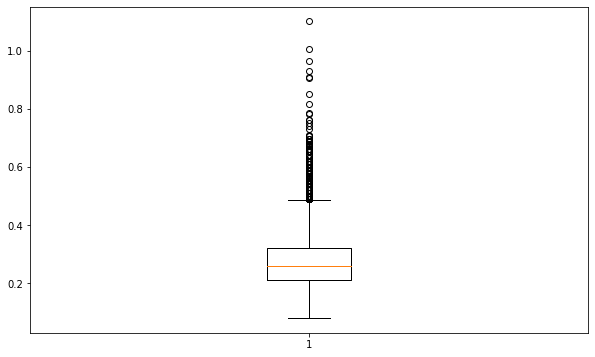

In [1791]:
plt.figure(figsize=(10,6))
plt.boxplot(df['volatile acidity'])
plt.show()

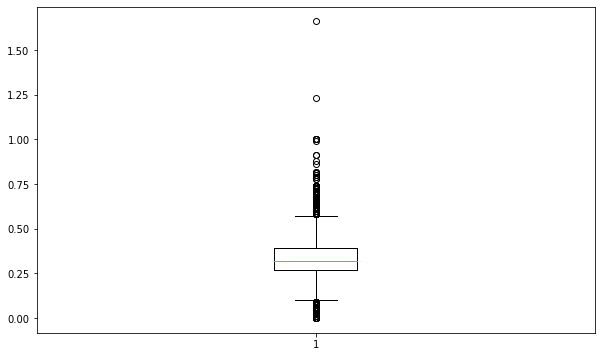

In [1792]:
plt.figure(figsize=(10,6))
plt.boxplot(df['citric acid'])
plt.show()

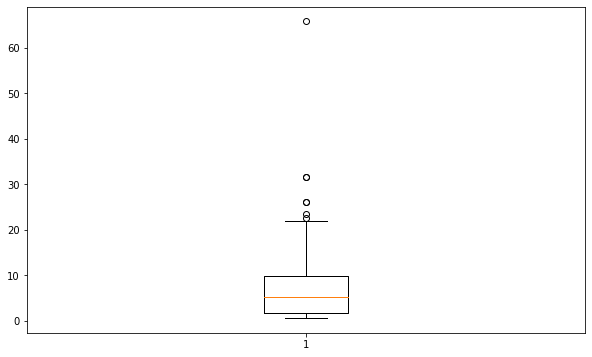

In [1793]:
plt.figure(figsize=(10,6))
plt.boxplot(df['residual sugar'])
plt.show()

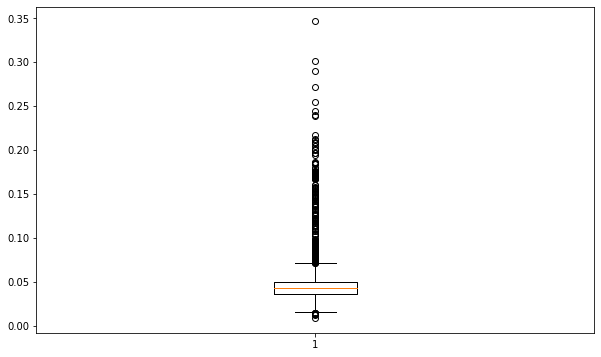

In [1794]:
plt.figure(figsize=(10,6))
plt.boxplot(df['chlorides'])
plt.show()

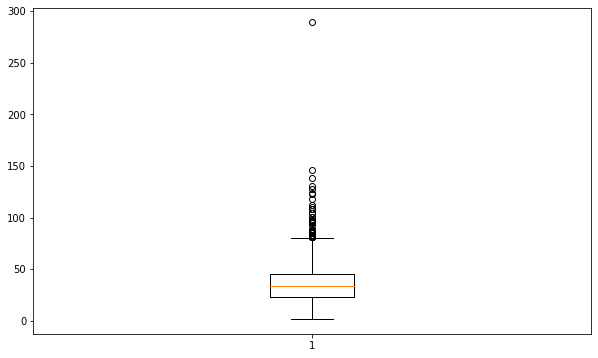

In [1795]:
plt.figure(figsize=(10,6))
plt.boxplot(df['free sulfur dioxide'])
plt.show()

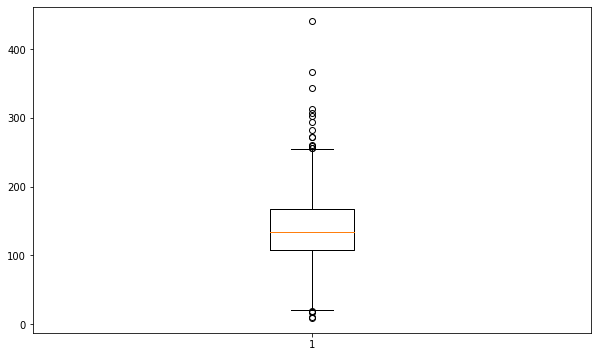

In [1796]:
plt.figure(figsize=(10,6))
plt.boxplot(df['total sulfur dioxide'])
plt.show()

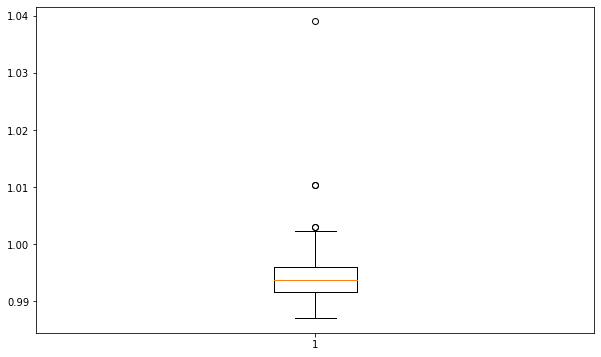

In [1797]:
plt.figure(figsize=(10,6))
plt.boxplot(df['density'])
plt.show()

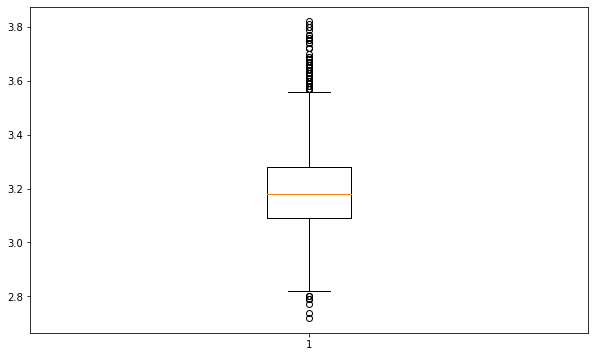

In [1798]:
plt.figure(figsize=(10,6))
plt.boxplot(df['pH'])
plt.show()

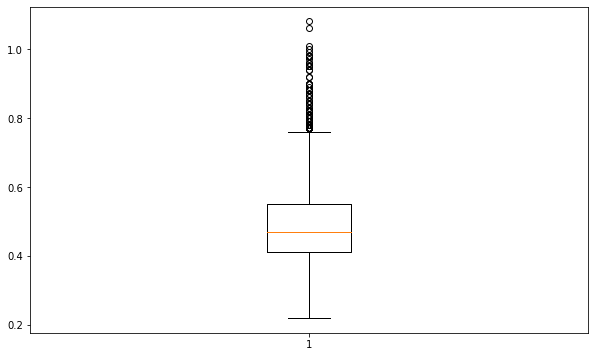

In [1799]:
plt.figure(figsize=(10,6))
plt.boxplot(df['sulphates'])
plt.show()

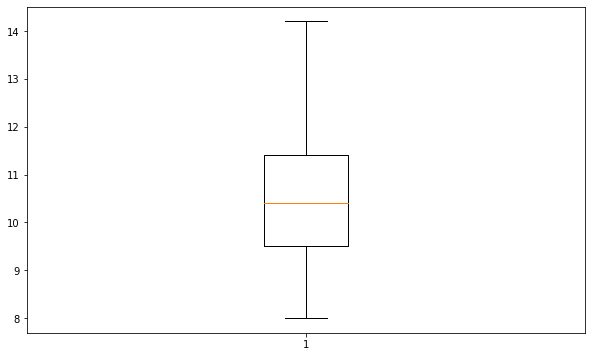

In [1800]:
plt.figure(figsize=(10,6))
plt.boxplot(df['alcohol'])
plt.show()

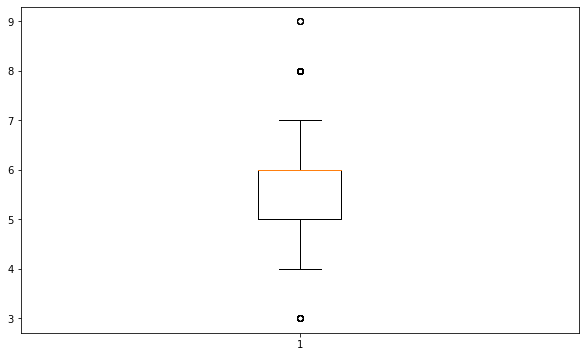

In [1801]:
plt.figure(figsize=(10,6))
plt.boxplot(df['quality'])
plt.show()

According to the diagram, we can see that:
- most of elements in dataset have outliers
- only the alcohol don't have outliers

=> therefore we need to exclude outliers

residual sugar
free sulfur dioxide
total sulfur dioxide


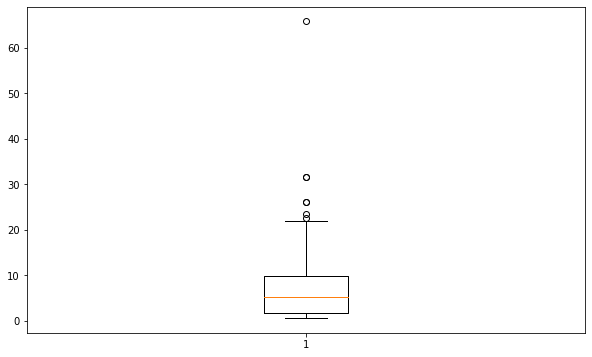

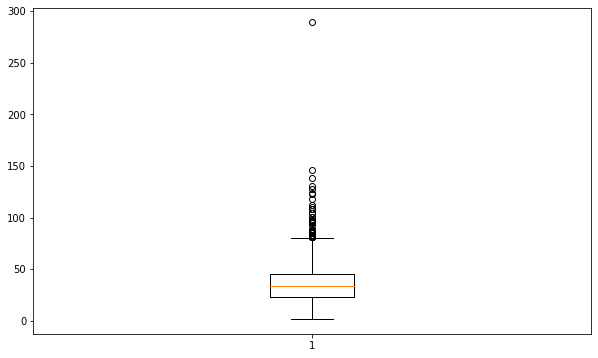

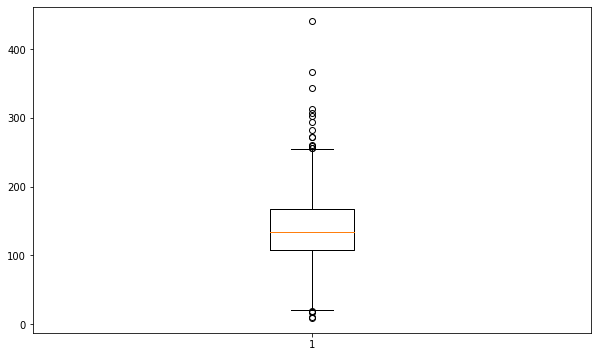

In [1802]:
outliers=['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
for i in outliers:
    print (i)
    plt.figure(figsize=(10,6))
    plt.boxplot(df[i])
    plt.show

In [1803]:
df_outliers=df[['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']] 
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   residual sugar        4898 non-null   float64
 1   free sulfur dioxide   4898 non-null   float64
 2   total sulfur dioxide  4898 non-null   float64
dtypes: float64(3)
memory usage: 114.9 KB


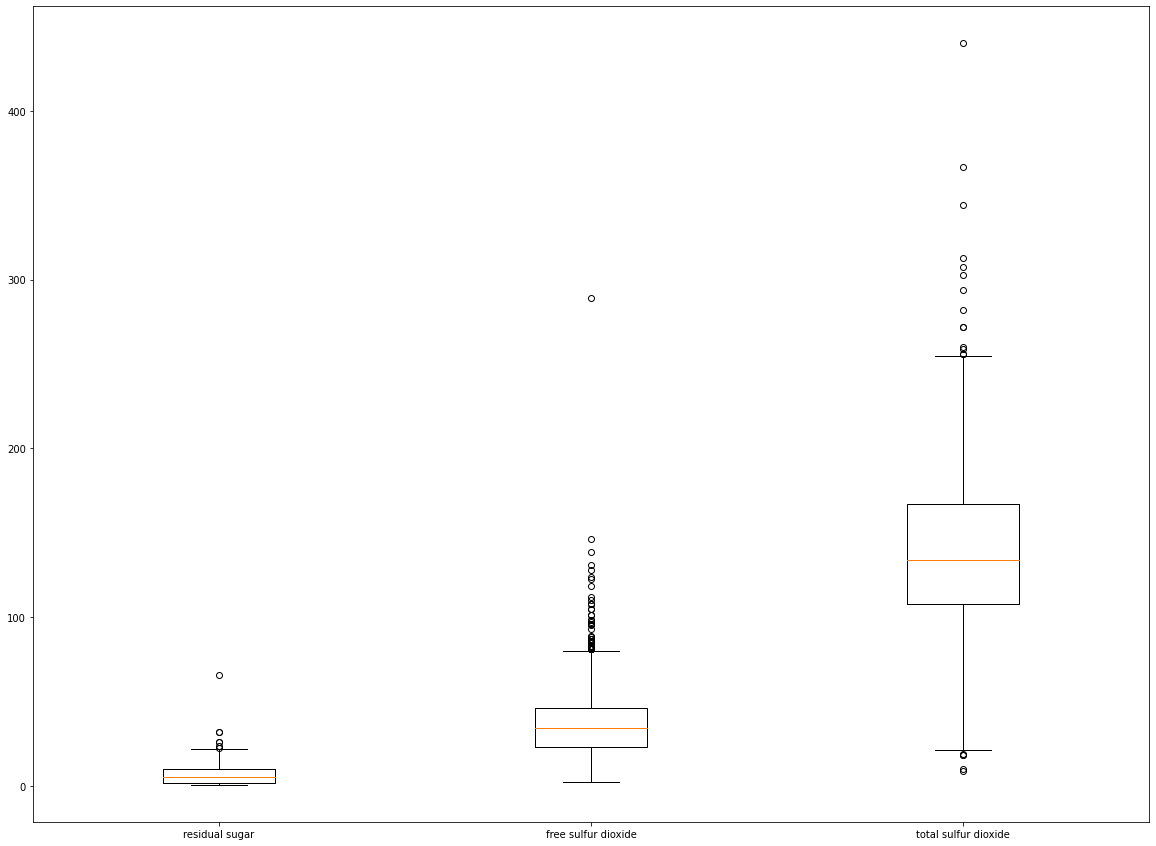

In [1804]:
plt.figure(figsize=(20,15))
plt.boxplot(df_outliers, labels= df_outliers.columns)
plt.show()

In [1805]:
percentiles = np.array([25, 75])
x_residualsugar = np.percentile(df['residual sugar'], percentiles)
IQR_residualsugar = iqr(df['residual sugar'])
x_residualsugar, IQR_residualsugar

(array([1.7, 9.9]), 8.200000000000001)

In [1806]:
x_residualsugar[1] + 1.5*IQR_residualsugar #upper

22.200000000000003

In [1807]:
x_residualsugar[0] - 1.5*IQR_residualsugar #lower

-10.600000000000001

In [1808]:
df['residual sugar'].quantile([0.25,0.5,0.75])

0.25    1.7
0.50    5.2
0.75    9.9
Name: residual sugar, dtype: float64

In [1809]:
df['residual sugar'] = np.where(df['residual sugar'] > 22.2, 5.2,df['residual sugar'])
df['residual sugar']

0       20.7
1        1.6
2        6.9
3        8.5
4        8.5
        ... 
4893     1.6
4894     8.0
4895     1.2
4896     1.1
4897     0.8
Name: residual sugar, Length: 4898, dtype: float64

In [1810]:
df['residual sugar'] = np.where(df['residual sugar'] < (-10.6), 5.2,df['residual sugar'])
df['residual sugar']

0       20.7
1        1.6
2        6.9
3        8.5
4        8.5
        ... 
4893     1.6
4894     8.0
4895     1.2
4896     1.1
4897     0.8
Name: residual sugar, Length: 4898, dtype: float64

<AxesSubplot:xlabel='residual sugar'>

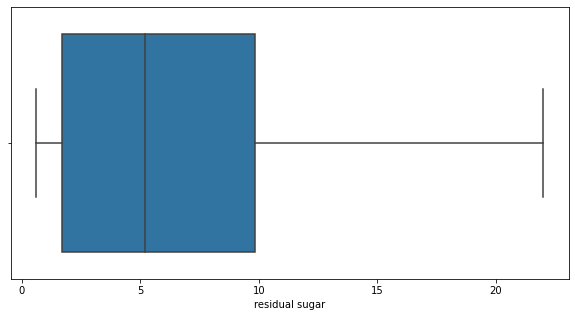

In [1811]:
plt.figure(figsize=(10,5))
sns.boxplot(df['residual sugar'])

In [1812]:
percentiles = np.array([25, 75])
x_fsd = np.percentile(df['free sulfur dioxide'], percentiles)
IQR_fsd = iqr(df['free sulfur dioxide'])
x_fsd, IQR_fsd

(array([23., 46.]), 23.0)

In [1813]:
x_fsd[1] + 1.5*IQR_fsd

80.5

In [1814]:
df['free sulfur dioxide'].quantile([0.25,0.5,0.75])

0.25    23.0
0.50    34.0
0.75    46.0
Name: free sulfur dioxide, dtype: float64

In [1815]:
x_fsd[0] - 1.5*IQR_fsd

-11.5

In [1816]:
df['free sulfur dioxide'] = np.where(df['free sulfur dioxide'] > 80.5, 34,df['free sulfur dioxide'])
df['free sulfur dioxide']

0       45.0
1       14.0
2       30.0
3       47.0
4       47.0
        ... 
4893    24.0
4894    57.0
4895    30.0
4896    20.0
4897    22.0
Name: free sulfur dioxide, Length: 4898, dtype: float64

<AxesSubplot:ylabel='free sulfur dioxide'>

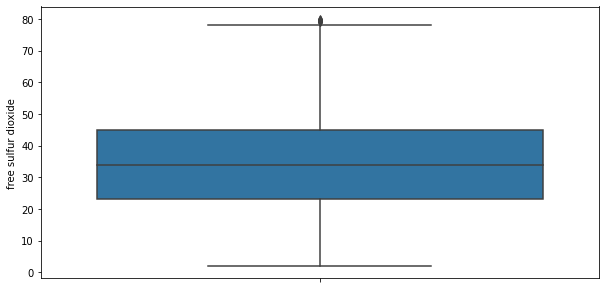

In [1817]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['free sulfur dioxide'])

In [1818]:
df['total sulfur dioxide'].quantile([0.25,0.5,0.75])

0.25    108.0
0.50    134.0
0.75    167.0
Name: total sulfur dioxide, dtype: float64

In [1819]:
percentiles = np.array([25, 75])
x_tsd = np.percentile(df['total sulfur dioxide'], percentiles)
IQR_tsd = iqr(df['total sulfur dioxide'])
x_tsd, IQR_tsd

(array([108., 167.]), 59.0)

In [1820]:
x_tsd[1] + 1.5*IQR_tsd

255.5

In [1821]:
x_tsd[0] - 1.5*IQR_tsd

19.5

In [1822]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide'] > 255.5, 134,df['total sulfur dioxide'])
df['total sulfur dioxide']

0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
4893     92.0
4894    168.0
4895    111.0
4896    110.0
4897     98.0
Name: total sulfur dioxide, Length: 4898, dtype: float64

In [1823]:
df['total sulfur dioxide'] = np.where(df['total sulfur dioxide'] < 19.5, 134,df['total sulfur dioxide'])
df['total sulfur dioxide']

0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
4893     92.0
4894    168.0
4895    111.0
4896    110.0
4897     98.0
Name: total sulfur dioxide, Length: 4898, dtype: float64

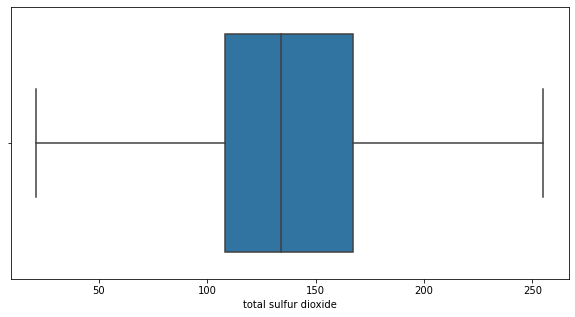

In [1824]:
plt.figure(figsize=(10,5))
sns.boxplot(df['total sulfur dioxide'])
plt.show()

In [1825]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.352460,0.045772,34.627093,138.002756,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,4.947198,0.021848,15.329771,41.314342,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,21.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.837500,0.050000,45.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,22.000000,0.346000,80.000000,255.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [1826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


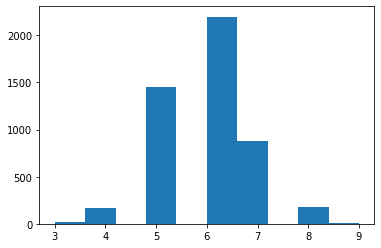

In [1827]:
plt.hist(df['quality'])
plt.show()

In [1828]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

According to the diagram:
- most of the wines get 5 or 6 in the quality level
- the level of wine quality is not equal, centralized at 5,6 and 7 

# RESAMPLING

In [1829]:
df_good = df[df['quality'] >= 6]
df_notgood = df[df['quality'] < 6]

In [1830]:
df_good.shape, df_notgood.shape

((3258, 12), (1640, 12))

In [1831]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3258 non-null   float64
 1   volatile acidity      3258 non-null   float64
 2   citric acid           3258 non-null   float64
 3   residual sugar        3258 non-null   float64
 4   chlorides             3258 non-null   float64
 5   free sulfur dioxide   3258 non-null   float64
 6   total sulfur dioxide  3258 non-null   float64
 7   density               3258 non-null   float64
 8   pH                    3258 non-null   float64
 9   sulphates             3258 non-null   float64
 10  alcohol               3258 non-null   float64
 11  quality               3258 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 330.9 KB


In [1832]:
df_rs2 = resample(df_notgood, replace=True, n_samples=df_good.shape[0], random_state=27)

In [1833]:
from imblearn.over_sampling import SMOTE

In [1834]:
df_new = pd.concat([df_rs2, df_good])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6516 entries, 2789 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6516 non-null   float64
 1   volatile acidity      6516 non-null   float64
 2   citric acid           6516 non-null   float64
 3   residual sugar        6516 non-null   float64
 4   chlorides             6516 non-null   float64
 5   free sulfur dioxide   6516 non-null   float64
 6   total sulfur dioxide  6516 non-null   float64
 7   density               6516 non-null   float64
 8   pH                    6516 non-null   float64
 9   sulphates             6516 non-null   float64
 10  alcohol               6516 non-null   float64
 11  quality               6516 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 661.8 KB


In [1835]:
X= df_new.drop('quality',axis=1)
X.shape

(6516, 11)

In [1836]:
y= df_new['quality']
y.shape

(6516,)

In [1837]:
# from sklearn.utils import resample
# from imblearn.over_sampling import RandomOverSampler

In [1838]:
# X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
#                            n_classes=2, n_clusters_per_class=1, weights=[0.1,0.9], class_sep=0.8, random_state=0)

In [1839]:
# rs = RandomOverSampler(random_state=0)

In [1840]:
# X_rs, y_rs = rs.fit_resample(X, y)

In [1841]:
# df_rs = pd.DataFrame(X_rs, columns=['x1','x2'])
# df_rs['target'] = y_rs
# df_rs.head()

In [1842]:
# df_rs['target'].value_counts()

In [1849]:
df_new['quality'].value_counts()

5    2900
6    2198
7     880
4     317
8     175
3      41
9       5
Name: quality, dtype: int64

# SCALING

In [1850]:
from sklearn.preprocessing import RobustScaler

In [1851]:
scaler= preprocessing.RobustScaler()

In [1852]:
robust_df_scale = scaler.fit_transform(df)
robust_df_scale = pd.DataFrame(robust_df_scale, columns= df_new.columns)
robust_df_scale.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.054788,0.165828,0.118263,0.141623,0.198025,0.028504,0.067843,0.065649,0.043509,0.141763,0.060141,-0.122091
std,0.843868,0.916314,1.008498,0.607951,1.560569,0.696808,0.700243,0.683245,0.794740,0.815185,0.647695,0.885639
min,-3.000000,-1.636364,-2.666667,-0.565284,-2.428571,-1.454545,-1.915254,-1.514563,-2.421053,-1.785714,-1.263158,-3.000000
25%,-0.500000,-0.454545,-0.416667,-0.430108,-0.500000,-0.500000,-0.440678,-0.460879,-0.473684,-0.428571,-0.473684,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.545455,0.583333,0.569892,0.500000,0.500000,0.559322,0.539121,0.526316,0.571429,0.526316,0.000000
max,7.400000,7.636364,11.166667,2.064516,21.642857,2.090909,2.050847,10.334666,3.368421,4.357143,2.000000,3.000000


In [1858]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1859]:
X = robust_df_scale.drop('quality',axis=1)
y = robust_df_scale['quality']
X.shape, y.shape

((4898, 11), (4898,))

In [1860]:
robust_df_scale['quality'].value_counts()

 0.0    2198
-1.0    1457
 1.0     880
 2.0     175
-2.0     163
-3.0      20
 3.0       5
Name: quality, dtype: int64

## BUILD MODEL BY LOGISTIC REGRESSION

In [1889]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [1890]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [1891]:
lr = LogisticRegression()

In [1892]:
lr.fit(X_train, y_train)

LogisticRegression()

In [1893]:
yhat_train = lr.predict(X_train)

In [1894]:
yhat_train_proba = lr.predict_proba(X_train)

In [1895]:
yhat_train[0:5]

array([1., 0., 0., 0., 0.])

In [1896]:
yhat_train_proba[0:5]

array([[2.04065465e-04, 6.28446452e-04, 1.67214286e-02, 3.96783012e-01,
        4.65525975e-01, 1.17042948e-01, 3.09412497e-03],
       [2.77482392e-04, 6.11958500e-03, 3.72762890e-01, 5.21712619e-01,
        8.10999862e-02, 1.79877351e-02, 3.97030901e-05],
       [6.36021473e-04, 1.72698441e-02, 1.70577380e-01, 5.48387890e-01,
        2.22898004e-01, 4.00458071e-02, 1.85053340e-04],
       [5.58417210e-04, 1.23409587e-02, 1.47311056e-01, 6.62721725e-01,
        1.58454253e-01, 1.80258853e-02, 5.87704469e-04],
       [3.55752093e-03, 9.21395682e-03, 2.18620264e-01, 5.59159575e-01,
        1.58771220e-01, 5.05748703e-02, 1.02592662e-04]])

In [1897]:
from sklearn.metrics import accuracy_score

In [1898]:
print('Train Accuracy:', lr.score(X_train, y_train))
print('Train Accuracy:', accuracy_score(y_train, yhat_train))

Train Accuracy: 0.5497702909647779
Train Accuracy: 0.5497702909647779


In [1899]:
yhat_test = lr.predict(X_test)

In [1900]:
print('Train Accuracy:', lr.score(X_test, y_test))
print('Train Accuracy:', accuracy_score(y_test, yhat_test))

Train Accuracy: 0.5244897959183673
Train Accuracy: 0.5244897959183673


In [1901]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         5
        -2.0       0.00      0.00      0.00        25
        -1.0       0.57      0.52      0.55       291
         0.0       0.51      0.73      0.60       432
         1.0       0.52      0.23      0.32       192
         2.0       0.00      0.00      0.00        35
         3.0       0.00      0.00      0.00         0

    accuracy                           0.52       980
   macro avg       0.23      0.21      0.21       980
weighted avg       0.50      0.52      0.49       980



In [1902]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, yhat_test)
cnf_matrix

array([[  0,   0,   1,   4,   0,   0,   0],
       [  0,   0,  14,  11,   0,   0,   0],
       [  0,   0, 152, 138,   1,   0,   0],
       [  0,   0,  83, 317,  31,   0,   1],
       [  0,   0,  14, 133,  45,   0,   0],
       [  0,   0,   2,  24,   9,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])